In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data=pd.read_csv('data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
dup=data.duplicated().any()

In [5]:
dup

True

In [6]:
data=data.drop_duplicates()
dup

True

In [7]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [8]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [12]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
st=StandardScaler()

In [15]:
data[cont_val]=st.fit_transform(data[cont_val])

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
X=data.drop('target',axis=1)
y=data['target']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred1=log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8688524590163934

In [22]:
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [23]:
y_pred2=svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7868852459016393

In [40]:
data = pd.read_csv('data.csv')
data = data.drop_duplicates()
X = data.drop('target',axis=1)
y=data['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=0)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7868852459016393

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred4= rf.predict(X_test)
accuracy_score(y_test,y_pred4)

0.819672131147541

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred5 = gbc.predict(X_test)
accuracy_score(y_test,y_pred5)

0.7049180327868853

In [44]:
final_data = pd.DataFrame({'Models':['LR','SVM','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100]})

In [45]:
final_data

,Models,ACC
0,LR,86.885246
1,SVM,78.688525
2,DT,78.688525
3,RF,81.967213
4,GB,70.491803


In [46]:
import matplotlib.pyplot as plt

In [47]:
a=final_data['Models']

In [48]:
b=final_data['ACC']

Text(0, 0.5, 'ACC')

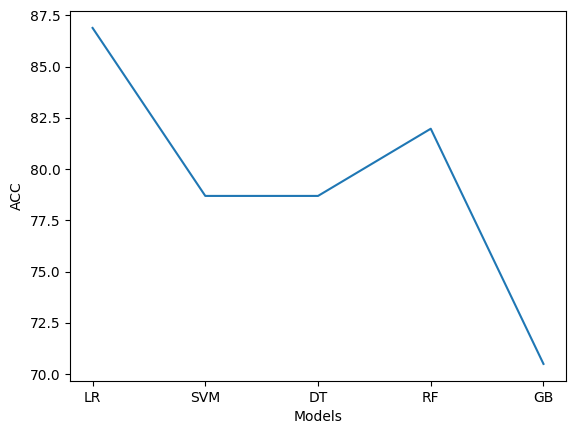

In [49]:
plt.plot(a,b)
plt.xlabel('Models')
plt.ylabel('ACC')

In [51]:
X=data.drop('target',axis=1)
y=data['target']

In [53]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X,y)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [55]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [56]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [57]:
import joblib
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [58]:
model = joblib.load('model_joblib_heart')
model.predict(new_data)

array([0], dtype=int64)

In [59]:
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
